## **KPrototypes Clustering**

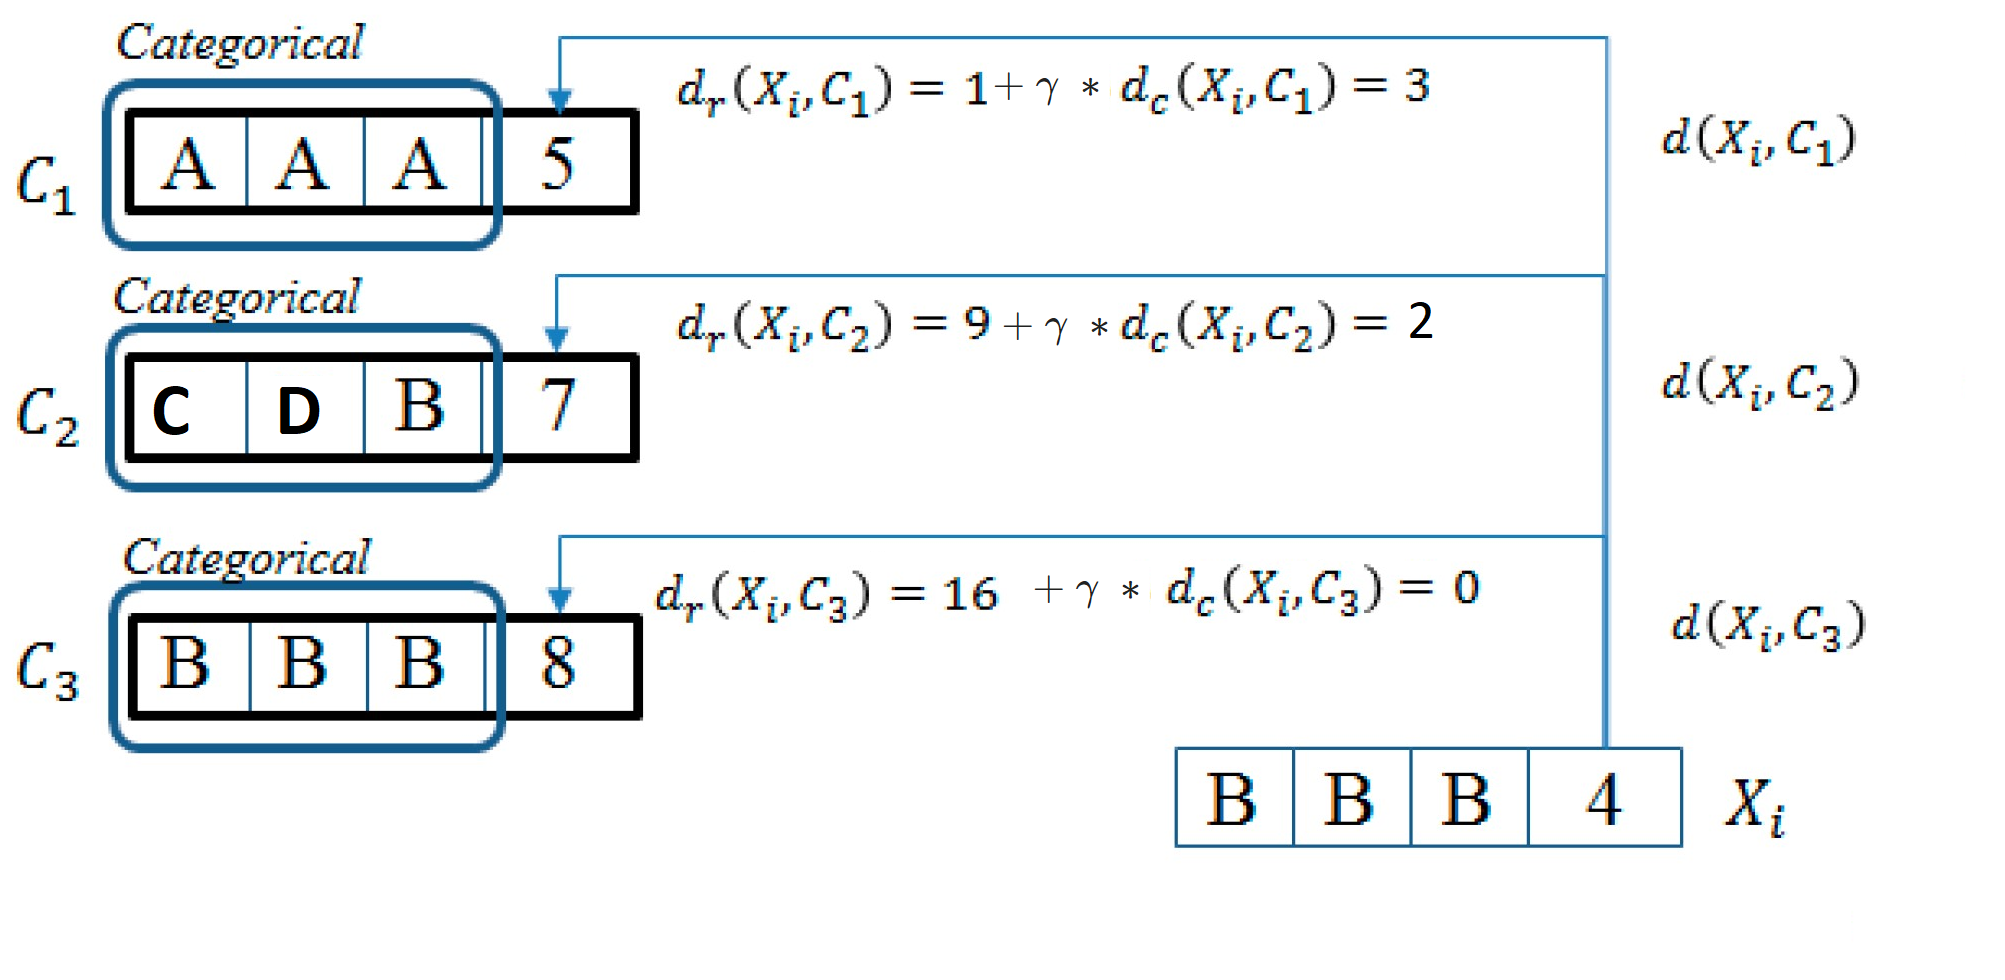

### K-prototypes is a clustering algorithm that combines k-means and k-modes algorithms. While k-means accepts only numerical data and k-modes only categorical data, k-prototypes accepts mixed data that includes both categorical and numerical features.

## **The K-prototypes Algorithm in 3 Steps:**

1. **Initialization:** K random data points are chosen as initial prototypes.
2. **Assignment:** Data points are assigned to the closest prototype based on a combined distance metric that considers both numerical and categorical features.
3. **Re-prototyping:** Prototypes are updated by:

   - recalculating the mean for numerical features within each cluster.
   - finding the mode (most frequent value) for each categorical feature within each cluster.

Steps 2 and 3 are repeated until the prototypes stabilize and no further reassignment occurs

#### **Mathematics Formula**
Suppose that X = { $ X_ {1} $ , $ X_ {2} $ $ \cdots $ $ X_ {n} $ } is a setof n objects and $X_ {i}$ = {$ {X_ {i1},X_ {i2}\cdots X_ {im}}$}$^ {T}$ where m denotes the variables and i denotes i-th cluster.
#### **The Measure of Similarity**
General formula for the measure of similarity is denoted as follows.
$d(X_ {i} $ $ Z_ {l} $ )= $ \sum _ {j=1}^ {m} $ $ \delta $ ( $ x_ {ij} $ , $ z_ {lj} $ )   ... (1)

where $ Z_ {l} $ =  {$ {z_ {l1},z_ {l2}\cdots z_ {lm}}$}$^ {T}$ is a prototype for cluster $l$.

A measure of similarity for numerical variables is well-known as euclidean distance that is denoted as follows.

d( $ X_ {i} $ , $ Z_ {l} $ )= $ \sqrt {\sum _ {j=1}^ {m_r}(x_ {ij}^ {r}- z_ {lj}^ {r})^ {2}} $   ... (2)

Where $x_{ij} ^ {r}$ is a value of numerical variables $j$, $z_{lj} ^ {r}$ is the average of prototype for numerical variables $j$ cluster $m$, and number of numerical variables.
While a measure of similarity for categorical variables is denoted as follows.

$d( X_ {i} $ , $ Z_ {l} $ )= $ \gamma _ {l} $ $ \sum _ {j=1+1}^ {m_ {c}} \delta( $ $x_{ij}^ {c} $ , $ z_ {lj}^ {c} $ )   ... (3)

Where simple matching similarity measure for categorical variables is denoted as follows.

 $ \delta $ ( $ x_ {ij}^ {c} $ , $ z_ {lj}^ {c} $ )  = $ \begin{cases}0,\ x_{ij}^{c}\ = \ z_{lj}^{c},\\1,\ x_{ij}^{c}\ != \ z_{lj}^{c}.\end{cases} $
   ... (4)

where $ \gamma_l $ denotes the weight for categorical variables for cluster $l$.

According to the equation (1) to (4) it obtains the measure of similarity prior to the data with numerical and categorical variables as follows.

d( $ X_ {i} $ , $ Z_ {l} $ )= $ \sqrt {\sum _ {j=1}^ {m_r}(x_ {ij}^ {r}\ - \ z_ {lj}^{r})^ {2}\ + \gamma_l\ \sum _ {j = i+1}^ {m_c}\delta(x_ {ij}^{c},\ z_ {lj}^{c})} $

or simply,

d( $ X_ {i} $ , $ Z_ {l} $ )= $ {\sum _ {j=1}^ {m_r}(x_ {ij}^ {r}\ - \ z_ {lj}^{r})^ {2}\ + \gamma_l\ \sum _ {j = i+1}^ {m_c}\delta(x_ {ij}^{c},\ z_ {lj}^{c})} $


##   

##   

##   

##   

##   

##   

##   

##   

In [ ]:
class my_KPrototypes:

  @classmethod
  def get_cost(cls, cluster_points, cluster_centroid, cat_col_indexes, num_col_indexes, num_dissim, gamma):
    cluster_points_num = cluster_points.iloc[:, num_col_indexes].values
    cluster_points_cat = cluster_points.iloc[:, cat_col_indexes].values
    cluster_centroid_num = cluster_centroid.iloc[:, num_col_indexes].values
    cluster_centroid_cat = cluster_centroid.iloc[:, cat_col_indexes].values
    if num_dissim == 'euclidean':
      cluster_num_dist_sq = np.sum((cluster_points_num - cluster_centroid_num) ** 2, axis = 1)
      cluster_cat_dist = np.sum((cluster_points_cat != cluster_centroid_cat), axis = 1)
      weighted_cluster_dissim = cluster_num_dist_sq + gamma * cluster_cat_dist
    else:
      cluster_num_dist = np.sum(np.abs(cluster_points_num - cluster_centroid_num), axis = 1)
      cluster_cat_dist = np.sum((cluster_points_cat != cluster_centroid_cat), axis = 1)
      weighted_cluster_dissim = cluster_num_dist + gamma * cluster_cat_dist
    cost = np.sum(weighted_cluster_dissim)
    return cost

  @classmethod
  def get_label(cls, pt, cluster_centroids, cat_col_indexes, num_col_indexes, num_dissim, gamma):
    pt_num = pt.iloc[:, num_col_indexes].values
    pt_cat = pt.iloc[:, cat_col_indexes].values
    cluster_centers_num = cluster_centroids.iloc[:, num_col_indexes].values
    cluster_centers_cat = cluster_centroids.iloc[:, cat_col_indexes].values
    if num_dissim == 'euclidean':
      cluster_num_dist_sq = np.sum((pt_num - cluster_centers_num) ** 2, axis = 1)
      cluster_cat_dist = np.sum((pt_cat != cluster_centers_cat), axis = 1)
      weighted_cluster_dissim = cluster_num_dist_sq + gamma * cluster_cat_dist
    else:
      cluster_num_dist = np.sum(np.abs(pt_num - cluster_centers_num), axis = 1)
      cluster_cat_dist = np.sum((pt_cat != cluster_centers_cat), axis = 1)
      weighted_cluster_dissim = cluster_num_dist + gamma * cluster_cat_dist

    return np.argmin(weighted_cluster_dissim)

  @classmethod
  def check_random_state(cls, random_state):
    from sklearn.utils import check_random_state
    return check_random_state(random_state)

  @classmethod
  def sample_without_replacement(cls, n_population, n_samples, random_state_):
    from sklearn.utils.random import sample_without_replacement
    return sample_without_replacement(n_population = n_population, n_samples = n_samples, random_state = random_state_)


  def __init__(self, n_clusters = 8, init = 'random', n_init = 10, max_iter = 100, num_dissim = 'euclidean', gamma = 0.5, random_state = 1):
    import numpy as np
    import pandas as pd
    import warnings

    if init != 'random' and type(init) != pd.DataFrame:
      raise Exception('The argument for initialization method i.e. init must be either "random", or a pandas DataFrame of cluster centers')
    elif init == 'random':
      self.n_clusters = n_clusters
      self.n_init = n_init
    else:
      self.n_clusters = (self.init).shape[0]
      if n_init > 1:
        warnings.warn("Warning: Setting number of initiliazations i.e. 'n_init' to 1 as cluster centers are passed as argument")
      self.n_init = 1

    self.init = init
    self.max_iter = max_iter
    self.random_state = random_state
    self.gamma = gamma
    self.num_dissim = num_dissim











































  def fit(self, X, categorical):
    import numpy as np
    import pandas as pd
    import warnings
    warnings.filterwarnings('ignore')
    n, d = X.shape

    try:
      categorical = np.array(categorical, dtype = 'int64')
      for col_idx in categorical:
        X_col_indexes = np.array([i for i in range(X.shape[1])])
        if np.all(col_idx > X_col_indexes):
          raise Exception("The argument for 'categorical' is out of index as per features of the dataset")
    except:
      X_cols = list(X.columns)
      for cat in categorical:
        if cat not in X_cols:
          raise Exception(f"The argument for 'categorical' has a feature '{cat}' which is not present in the dataset")
      categorical = np.array([idx for idx, col_name in enumerate(X_cols) if col_name in categorical])

    if type(self.init) == pd.DataFrame and ((self.init).shape[1] != X.shape[1]):
      raise Exception("The dimensions of the initialized cluster centers doesn't match with the dimensions of the data")

    self.categorical = categorical
    self.numerical = np.array([i for i in range(d) if i not in categorical])
    random_state = self.check_random_state(self.random_state)
    final_cluster_centroids = None
    final_labels = None
    least_cost = np.inf

    for iter_ in range(self.n_init):

      if self.init == 'random':
        cluster_centroids_indexes = my_KPrototypes.sample_without_replacement(n_population = n, n_samples = self.n_clusters, random_state_ = random_state)
        cluster_centroids = X.iloc[cluster_centroids_indexes, :]
      else:
        cluster_centroids = self.init

      labels = np.zeros(n,)
      for i in range(self.max_iter):
        for idx in range(X.shape[0]):
          pt = X.iloc[[idx], :]
          cluster_label = my_KPrototypes.get_label(pt, cluster_centroids, self.categorical, self.numerical, self.num_dissim, self.gamma)
          labels[idx] = cluster_label
        for label in range(self.n_clusters):
          cluster_pts = X.loc[labels == label, :]
          cluster_centroids.iloc[label, self.numerical] = np.mean(cluster_pts.iloc[:, self.numerical], axis = 0)
          cluster_centroids.iloc[label, self.categorical] = cluster_pts.iloc[:, self.categorical].mode(axis = 0)\
                                                            .apply(lambda x: np.random.choice(x.dropna())).to_frame().T

      cost = 0

      for label in range(cluster_centroids.shape[0]):
        cluster_centroid = cluster_centroids.iloc[[label], :]
        cluster_pts = X.loc[labels == label, :]
        cost += my_KPrototypes.get_cost(cluster_pts, cluster_centroid, self.categorical, self.numerical, self.num_dissim, self.gamma)

      if cost < least_cost:
        least_cost = cost
        final_cluster_centroids = cluster_centroids
        final_labels = labels

    self.labels_ = final_labels
    self.cluster_centroids_ = final_cluster_centroids
    self.cost_ = least_cost


  def predict(self, X):
    import warnings
    warnings.filterwarnings('ignore')
    if 'labels_' not in dir(self):
      raise Exception("The model has not been fit on data yet")
    import numpy as np
    n = X.shape[0]
    labels = np.zeros(n,)

    for idx in range(X.shape[0]):
      pt = X.iloc[[idx], :]
      cluster_label = my_KPrototypes.get_label(pt, self.cluster_centroids_, self.categorical, self.numerical, self.num_dissim, self.gamma)
      labels[idx] = cluster_label
    return labels


  def fit_predict(self, X):
    import numpy as np
    self.fit(X)
    return self.labels_

## **KPrototypes Time Complexity : $O(n * k * d * i)$**
## **KPrototypes Space Complexity : $O(n + k * d)$ --> n for storing cluster labels for each of the data point and k * d for storing centroid coordinates for k clusters**
## **where n = number of data points, k = number of clusters, d = number of dimensions of data, i = number of iterations for which algorithm is run**